## Titanic Data cleaning

In [1]:
#import the libraries required for the analysis
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#create the file path
path = r"C:\Users\pc\Downloads\dataset\titanic_data\tested.csv"

In [3]:
#read in the data for the work
df = pd.read_csv(path)
df.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q


In [4]:
#check the number of rows and columns
df.shape

(418, 12)

In [5]:
#check the information about the data based on its data types and bytes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
#change the data type of PassengerId to string
df["PassengerId"] = df["PassengerId"].astype(str)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    object 
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 39.3+ KB


In [8]:
#check for null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
#remove irrelevant columns, they will not be used in the analysis
df.drop(["Name","Cabin","Ticket"], axis=1, inplace=True)

In [10]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,male,34.5,0,0,7.8292,Q
1,893,1,3,female,47.0,1,0,7.0000,S
2,894,0,2,male,62.0,0,0,9.6875,Q
3,895,0,3,male,27.0,0,0,8.6625,S
4,896,1,3,female,22.0,1,1,12.2875,S


In [11]:
df["Embarked"].unique()

array(['Q', 'S', 'C'], dtype=object)

In [12]:
#replace Q as Queensland (Ireland), S as Southampton (England) and C as Choubourg (France)
df["Embarked"] = df["Embarked"].replace({"Q":"Queensland", "S":"Southampton", "C": "Choubourg"})
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,male,34.5,0,0,7.8292,Queensland
1,893,1,3,female,47.0,1,0,7.0000,Southampton
2,894,0,2,male,62.0,0,0,9.6875,Queensland
3,895,0,3,male,27.0,0,0,8.6625,Southampton
4,896,1,3,female,22.0,1,1,12.2875,Southampton
...,...,...,...,...,...,...,...,...,...
413,1305,0,3,male,NaN,0,0,8.0500,Southampton
414,1306,1,1,female,39.0,0,0,108.9000,Choubourg
415,1307,0,3,male,38.5,0,0,7.2500,Southampton
416,1308,0,3,male,NaN,0,0,8.0500,Southampton


In [13]:
#get the mean age of the Ages of the passenger
mean_age = round(df["Age"].mean(),2)
mean_age

30.27

In [14]:
#fill the mean_age value into the null spaces in the Age column
df["Age"] = df["Age"].fillna(mean_age)


In [15]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

In [16]:
#get the average fare of the fares of the passenger
ave_fare = round(df["Fare"].mean(),2)
ave_fare

35.63

In [17]:
#fill the ave_fare value into the null spaces in the Fare column
df["Fare"] = df["Fare"].fillna(ave_fare)

In [18]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [19]:
#check for duplicate values
df.duplicated().sum()

0

In [20]:
df["Survived"].unique()

array([0, 1], dtype=int64)

In [21]:
df["Pclass"].unique()

array([3, 2, 1], dtype=int64)

In [22]:
df["Age"].unique()

array([34.5 , 47.  , 62.  , 27.  , 22.  , 14.  , 30.  , 26.  , 18.  ,
       21.  , 30.27, 46.  , 23.  , 63.  , 24.  , 35.  , 45.  , 55.  ,
        9.  , 48.  , 50.  , 22.5 , 41.  , 33.  , 18.5 , 25.  , 39.  ,
       60.  , 36.  , 20.  , 28.  , 10.  , 17.  , 32.  , 13.  , 31.  ,
       29.  , 28.5 , 32.5 ,  6.  , 67.  , 49.  ,  2.  , 76.  , 43.  ,
       16.  ,  1.  , 12.  , 42.  , 53.  , 26.5 , 40.  , 61.  , 60.5 ,
        7.  , 15.  , 54.  , 64.  , 37.  , 34.  , 11.5 ,  8.  ,  0.33,
       38.  , 57.  , 40.5 ,  0.92, 19.  , 36.5 ,  0.75,  0.83, 58.  ,
        0.17, 59.  , 14.5 , 44.  ,  5.  , 51.  ,  3.  , 38.5 ])

In [23]:
df["SibSp"].unique()

array([0, 1, 2, 3, 4, 5, 8], dtype=int64)

In [24]:
df["Parch"].unique()

array([0, 1, 3, 2, 4, 6, 5, 9], dtype=int64)

In [25]:
df["Fare"].unique()

array([  7.8292,   7.    ,   9.6875,   8.6625,  12.2875,   9.225 ,
         7.6292,  29.    ,   7.2292,  24.15  ,   7.8958,  26.    ,
        82.2667,  61.175 ,  27.7208,  12.35  ,   7.225 ,   7.925 ,
        59.4   ,   3.1708,  31.6833,  61.3792, 262.375 ,  14.5   ,
        61.9792,  30.5   ,  21.6792,  31.5   ,  20.575 ,  23.45  ,
        57.75  ,   8.05  ,   9.5   ,  56.4958,  13.4167,  26.55  ,
         7.85  ,  13.    ,  52.5542,  29.7   ,   7.75  ,  76.2917,
        15.9   ,  60.    ,  15.0333,  23.    , 263.    ,  15.5792,
        29.125 ,   7.65  ,  16.1   ,  13.5   ,   7.725 ,  21.    ,
         7.8792,  42.4   ,  28.5375, 211.5   ,  25.7   ,  15.2458,
       221.7792,  10.7083,  14.4542,  13.9   ,   7.775 ,  52.    ,
         7.7958,  78.85  ,   7.8542,  55.4417,   8.5167,  22.525 ,
         7.8208,   8.7125,  15.0458,   7.7792,  31.6792,   7.2833,
         6.4375,  16.7   ,  75.2417,  15.75  ,   7.25  ,  23.25  ,
        28.5   ,  25.4667,  46.9   , 151.55  ,  18.    ,  51.8

In [26]:
df["Embarked"].unique()

array(['Queensland', 'Southampton', 'Choubourg'], dtype=object)

## Analysis
Summary statistics using groupby() function

In [27]:
#show the transportation revenue derived from the trip based on passengers location
fare_revenue= df.groupby("Embarked")["Fare"].sum().sort_values()
fare_revenue

Embarked
Queensland      504.0542
Choubourg      6758.4960
Southampton    7629.6174
Name: Fare, dtype: float64

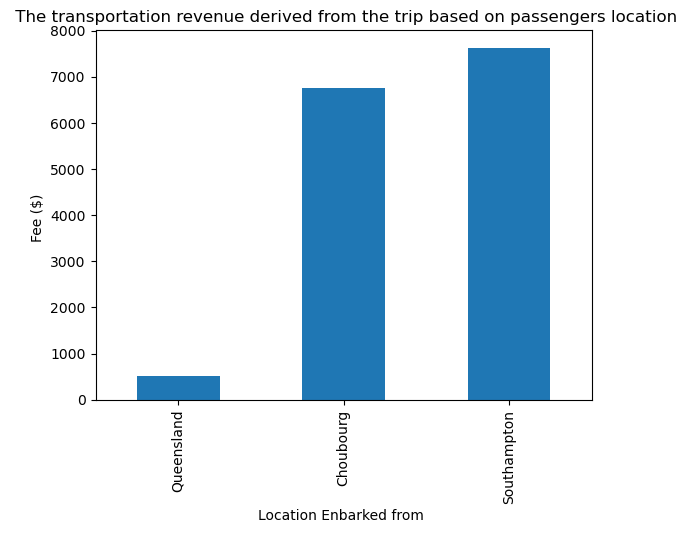

In [28]:
fare_revenue.plot(kind='bar')
plt.xlabel("Location Enbarked from ")
plt.ylabel("Fee ($) ")
plt.title(" The transportation revenue derived from the trip based on passengers location")
plt.show()

In [29]:
df.groupby("Sex")["Embarked"].count()

Sex
female    152
male      266
Name: Embarked, dtype: int64

In [30]:
survivor_chat =df.groupby("Survived")["Embarked"].value_counts(normalize=True)
survivor_chat

Survived  Embarked   
0         Southampton    0.684211
          Choubourg      0.233083
          Queensland     0.082707
1         Southampton    0.578947
          Choubourg      0.263158
          Queensland     0.157895
Name: proportion, dtype: float64

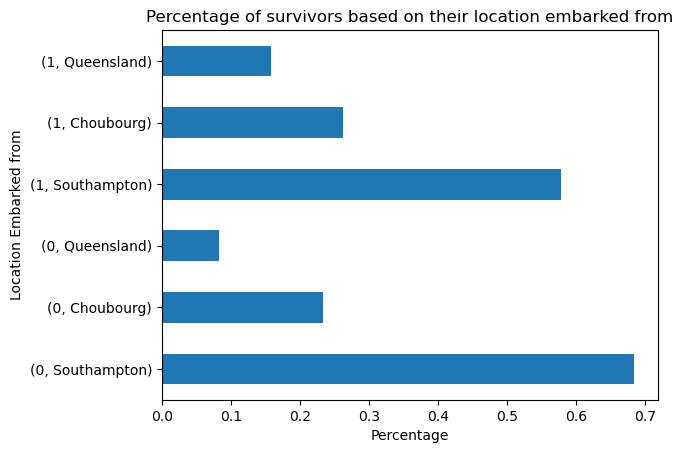

In [31]:
survivor_chat.plot(kind='barh')
plt.xlabel("Percentage")
plt.ylabel("Location Embarked from")
plt.title("Percentage of survivors based on their location embarked from")
plt.show()

## our class activity:
we are using a dataset from a brewery in Africa to do profit analysis

In [32]:
file_path =r"C:\Users\pc\Downloads\dataset\International_Breweries.csv"

In [33]:
data = pd.read_csv(file_path)
data.head()

,SALES_ID,SALES_REP,EMAILS,BRANDS,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,COUNTRIES,REGION,MONTHS,YEARS
0,10101,Jardine,jard@gmail.com,trophy,150,200,725,145000,36250,Ghana,Southeast,January,2019
1,10102,Gill,gillhell@uk.com,budweiser,250,500,815,407500,203750,Nigeria,west,February,2018
2,10103,Sorvino,sorvi2000@gmail.com,castle lite,180,450,937,421650,252990,Togo,southsouth,March,2018
3,10104,Jones,jone.ai@yahoo.com,eagle lager,170,250,765,191250,61200,Benin,northwest,April,2018
4,10105,Andrews,andy@gmail.com,hero,150,200,836,167200,41800,Senegal,northeast,May,2017


In [34]:
data.shape

(1047, 13)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SALES_ID    1047 non-null   int64 
 1   SALES_REP   1047 non-null   object
 2   EMAILS      1047 non-null   object
 3   BRANDS      1047 non-null   object
 4   PLANT_COST  1047 non-null   int64 
 5   UNIT_PRICE  1047 non-null   int64 
 6   QUANTITY    1047 non-null   int64 
 7   COST        1047 non-null   int64 
 8   PROFIT      1047 non-null   int64 
 9   COUNTRIES   1047 non-null   object
 10  REGION      1047 non-null   object
 11  MONTHS      1047 non-null   object
 12  YEARS       1047 non-null   int64 
dtypes: int64(7), object(6)
memory usage: 106.5+ KB


In [36]:
data.isna().sum()

SALES_ID      0
SALES_REP     0
EMAILS        0
BRANDS        0
PLANT_COST    0
UNIT_PRICE    0
QUANTITY      0
COST          0
PROFIT        0
COUNTRIES     0
REGION        0
MONTHS        0
YEARS         0
dtype: int64

In [37]:
data.describe()

,SALES_ID,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,YEARS
count,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000
mean,10624.000000,152.989494,271.728749,850.737345,231034.049666,100847.583572,2017.941738
std,302.387169,53.125477,133.378553,86.991652,115658.626612,77581.775930,0.808325
min,10101.000000,80.000000,150.000000,700.000000,105300.000000,35000.000000,2017.000000
25%,10362.500000,90.000000,150.000000,776.000000,141425.000000,46880.000000,2017.000000
50%,10624.000000,150.000000,200.000000,853.000000,184400.000000,58080.000000,2018.000000
75%,10885.500000,180.000000,450.000000,927.000000,351450.000000,191205.000000,2019.000000
max,11147.000000,250.000000,500.000000,1000.000000,499500.000000,269190.000000,2019.000000


In [38]:
data["COUNTRIES"].unique()

array(['Ghana', 'Nigeria', 'Togo', 'Benin', 'Senegal'], dtype=object)

In [39]:
#create a new column called Territories

territory = []
for country in data["COUNTRIES"]:
    if country in ['Nigeria', 'Ghana']:
        territory.append('Anglophone')
    else:
        territory.append('Francophone')

data["TERRITORIES"] = territory

In [40]:
data.head()

,SALES_ID,SALES_REP,EMAILS,BRANDS,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,COUNTRIES,REGION,MONTHS,YEARS,TERRITORIES
0,10101,Jardine,jard@gmail.com,trophy,150,200,725,145000,36250,Ghana,Southeast,January,2019,Anglophone
1,10102,Gill,gillhell@uk.com,budweiser,250,500,815,407500,203750,Nigeria,west,February,2018,Anglophone
2,10103,Sorvino,sorvi2000@gmail.com,castle lite,180,450,937,421650,252990,Togo,southsouth,March,2018,Francophone
3,10104,Jones,jone.ai@yahoo.com,eagle lager,170,250,765,191250,61200,Benin,northwest,April,2018,Francophone
4,10105,Andrews,andy@gmail.com,hero,150,200,836,167200,41800,Senegal,northeast,May,2017,Francophone


In [44]:
#checking for duplicated rows
data.duplicated().sum()

0

In [53]:
# 1.  Within the space of the last three years, what was the profit worth of the breweries,inclusive of the anglophone and the francophone territories?
data.groupby(["YEARS","TERRITORIES"])["PROFIT"].sum()

YEARS  TERRITORIES
2017   Anglophone     15749550
       Francophone    22753770
2018   Anglophone     14690320
       Francophone    22373530
2019   Anglophone     11949390
       Francophone    18070860
Name: PROFIT, dtype: int64

In [47]:
# 2. Compare the total profit between these two territories in order for the territory manager,Mr. Stone made a strategic decision that will aid profit maximization in 2020.
data.groupby(["TERRITORIES"])["PROFIT"].sum()

TERRITORIES
Anglophone     42389260
Francophone    63198160
Name: PROFIT, dtype: int64

In [62]:
# 3. Country that generated the highest profit in 2019
data.groupby(["YEARS","COUNTRIES"])["PROFIT"].sum()

YEARS  COUNTRIES
2017   Benin        7795390
       Ghana        7176000
       Nigeria      8573550
       Senegal      8289100
       Togo         6669280
2018   Benin        7893240
       Ghana        6692980
       Nigeria      7997340
       Senegal      6508530
       Togo         7971760
2019   Benin        5273340
       Ghana        7144070
       Nigeria      4805320
       Senegal      6687560
       Togo         6109960
Name: PROFIT, dtype: int64

In [63]:
#4. Help him find the year with the highest profit.
data.groupby("YEARS")["PROFIT"].sum()

YEARS
2017    38503320
2018    37063850
2019    30020250
Name: PROFIT, dtype: int64

In [64]:
# 5.  Which month in the three years was the least profit generated
data.groupby(["YEARS","MONTHS"])["PROFIT"].min().sort_values()

YEARS  MONTHS   
2017   December     35000
       February     35050
2018   April        35100
2017   June         35200
2019   August       35200
2018   June         35250
2019   June         35300
       February     35300
       December     35300
2018   February     35350
2019   November     35450
2017   October      35450
2019   September    35500
2018   March        35750
       May          35800
2017   April        36200
2019   January      36250
2017   May          36350
       August       36400
2019   April        36550
2018   July         36550
2017   July         36900
2018   January      36950
       September    37100
       August       37500
       October      37850
       December     38150
2019   March        38500
       October      38650
2018   November     38750
2017   November     38850
2019   July         39350
2017   January      40650
       March        40850
2019   May          41400
2017   September    41750
Name: PROFIT, dtype: int64

In [70]:
#6. What was the minimum profit in the month of December 2018?
data_yr2018 = data[data["YEARS"]==2018]
data_yr2018.groupby(["MONTHS"])["PROFIT"].min().sort_values()


MONTHS
April        35100
June         35250
February     35350
March        35750
May          35800
July         36550
January      36950
September    37100
August       37500
October      37850
December     38150
November     38750
Name: PROFIT, dtype: int64

In [81]:
#Extra question: 
#who is the best sales representative for the year 2019 based on profit?
data_yr2019 = data[data["YEARS"]==2019]
data_yr2019.groupby(["SALES_REP"])["PROFIT"].sum().sort_values()

SALES_REP
Howard      1191680
Thompson    1337430
Morgan      1977070
Parent      2008060
Kivell      2152910
Smith       2201640
Sorvino     2626640
Jardine     3277600
Andrews     3314410
Gill        3650570
Jones       6282240
Name: PROFIT, dtype: int64

In [89]:
#7. Compare the profit in percentage for each of the month in 2019
data_yr2019 = data[data["YEARS"]==2019]
percent_prof =(data_yr2019["PROFIT"] / (data_yr2019["COST"]))*100
data_yr2019["percentage profit"] = percent_prof
data_yr2019.head()

C:\Users\pc\AppData\Local\Temp\ipykernel_19444\2940024662.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_yr2019["percentage profit"] = percent_prof


,SALES_ID,SALES_REP,EMAILS,BRANDS,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,COUNTRIES,REGION,MONTHS,YEARS,TERRITORIES,percentage profit
0,10101,Jardine,jard@gmail.com,trophy,150,200,725,145000,36250,Ghana,Southeast,January,2019,Anglophone,25.000000
5,10106,Jardine,jard@gmail.com,beta malt,80,150,798,119700,55860,Ghana,northcentral,June,2019,Anglophone,46.666667
8,10109,Morgan,morganny@gmail.com,budweiser,250,500,700,350000,175000,Benin,southsouth,September,2019,Francophone,50.000000
11,10112,Jones,jone.ai@yahoo.com,hero,150,200,902,180400,45100,Nigeria,northcentral,December,2019,Anglophone,25.000000
15,10116,Jones,jone.ai@yahoo.com,budweiser,250,500,709,354500,177250,Ghana,northwest,April,2019,Anglophone,50.000000


In [93]:
data_yr2019.groupby(["MONTHS"])["percentage profit"].sum().sort_values()

MONTHS
February      648.000000
October       855.666667
December      869.333333
September     942.000000
April        1035.333333
March        1060.666667
August       1074.000000
May          1091.333333
July         1101.666667
November     1140.333333
June         1140.666667
January      1249.666667
Name: percentage profit, dtype: float64

In [99]:
#8. Which particular brand generated the highest profit in Senegal?
data.groupby(["BRANDS"])["PROFIT"].sum().idxmax()

'castle lite'